In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-11-11 02:42:57,205: Credentials are already in use. The existing account in the session will be replaced.


In [11]:
#DOES NOT GENERALIZE WELL
def prepareWState(*rotationAngles):
    assert(len(rotationAngles) >= 3) #prevent IdenxOutOfBounds Errors
    qc = QuantumCircuit(3)
    qc.ry(rotationAngles[0], 1)
    qc.cx(1, 2)
    qc.ry(rotationAngles[1], 2)
    qc.cx(2, 1)
    qc.ry(rotationAngles[2], 1)
    qc.x(1)
    qc.x(2)
    qc.ccx(0, 1, 2)
    qc.x(1)
    qc.x(2)
    return qc

In [9]:
WState = prepareWState(np.pi/2, np.pi/2, np.pi/2)

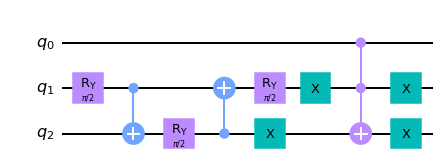

In [10]:
WState.draw('mpl')

In [101]:
class EntanglementDoer:
    def __init__(self, num_qubits):
        self.num_qubits = num_qubits
    
    def lameEntanglement(self, cringe):
        qc = QuantumCircuit(self.num_qubits)
        for i in range(self.num_qubits): qc.h(i)
        for i in range(self.num_qubits): qc.cx(i, (i+1) % self.num_qubits)
        if not cringe:
            for i in range(self.num_qubits):
                qc.u(np.random.random() * 2 * np.pi, np.random.random() * 2 * np.pi, np.random.random() * 2 * np.pi, i)
        return qc
    
    def basedEntanglement(self, rotGate):
        assert(rotGate in ["RX", "RY", "RZ", "rx", "ry", "r", "Z", "z", "y", "Y"])
        qc = QuantumCircuit(self.num_qubits)
        for i in range(self.num_qubits): qc.h(i)
        for i in range(self.num_qubits): qc.cx(i, (i+1) % self.num_qubits)
        for i in range(self.num_qubits):
            if rotGate == "RX" or rotGate == "rx": qc.rx(np.random.random() * 2 * np.pi, i)
            elif rotGate == "RY" or rotGate == "ry": qc.ry(np.random.random() * 2 * np.pi, i)
            elif rotGate == "RZ" or rotGate == "rz": qc.rz(np.random.random() * 2 * np.pi, i)
            elif rotGate == "Z" or rotGate == "z": qc.z(i)
            elif rotGate == "Y" or rotGate == "y": qc.y(i)
            else: pass
        for i in range(self.num_qubits):
            qc.ccx(i, (i+1) % self.num_qubits, (i+2) % self.num_qubits)
        for i in range(self.num_qubits):
            qc.rzz(np.random.random() * 2 * np.pi, i, (i+1) % self.num_qubits)
        for i in range(self.num_qubits):
            qc.rxx(np.random.random() * 2 * np.pi, i, (i+1) % self.num_qubits)
        return qc
    
    def sussyEntanglement(self, rotGate, rotAngles):
        assert(rotGate in ["RX", "RY", "RZ", "rx", "ry", "r", "Z", "z", "y", "Y"])
        qc = QuantumCircuit(self.num_qubits)
        for i in range(self.num_qubits): qc.h(i)
        for i in range(self.num_qubits): qc.cx(i, (i+1) % self.num_qubits)
        for i in range(self.num_qubits):
            if rotGate == "RX" or rotGate == "rx": qc.rx(rotAngles[i], i)
            elif rotGate == "RY" or rotGate == "ry": qc.ry(rotAngles[i], i)
            elif rotGate == "RZ" or rotGate == "rz": qc.rz(rotAngles[i], i)
            elif rotGate == "Z" or rotGate == "z": qc.z(i)
            elif rotGate == "Y" or rotGate == "y": qc.y(i)
            else: pass
        for i in range(self.num_qubits):
            qc.rzz(np.random.random() * 2 * np.pi, i, (i+1) % self.num_qubits)
        return qc

In [102]:
ED = EntanglementDoer(4)

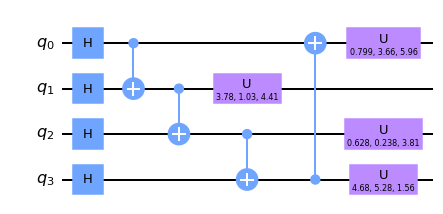

In [103]:
ED.lameEntanglement(False).draw('mpl')

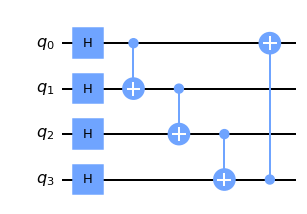

In [104]:
ED.lameEntanglement(True).draw('mpl')

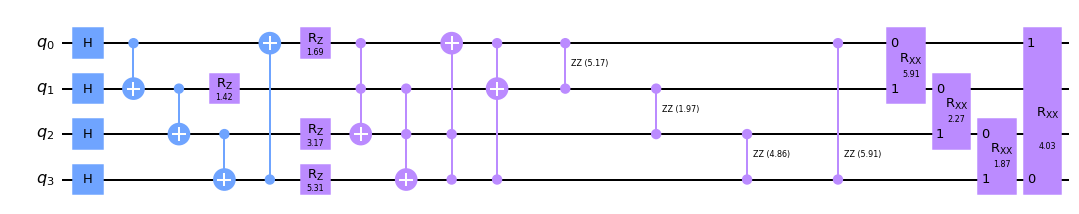

In [112]:
ED.basedEntanglement("RZ").draw('mpl')

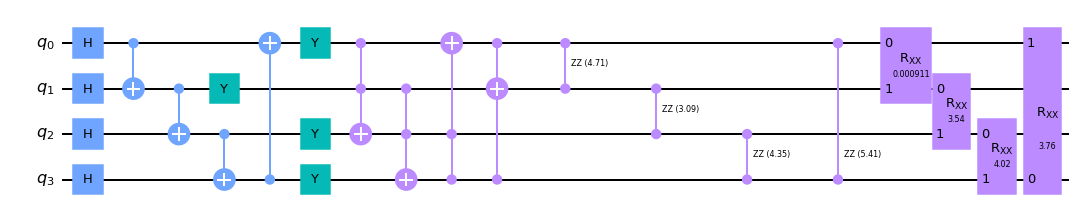

In [108]:
ED.basedEntanglement("Y").draw('mpl')

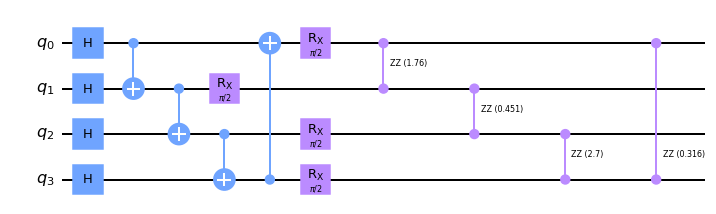

In [111]:
ED.sussyEntanglement("RX", [np.pi/2] * 4).draw('mpl')